In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from myfunc import timer
from myfunc import DirMan
import config
import matplotlib

pd.set_option('display.max_columns', None)
font = {'family': 'Times New Roman'}
matplotlib.rc('font', **font)

# configuration
# resolution = "0p1"
resolution = "500"
region = [-180,180,-60,90]
data_path = f'/tera11/zhwei/students/Xionghui/data/run/{resolution}/'
post_data_path = '/tera11/zhwei/students/Xionghui/data/'
shp_path = '/tera11/zhwei/students/Xionghui/data/Shp/'
fig_path = f'/home/xuxh22/stu01/Bedrock/fig/{resolution}/'
path = '/home/xuxh22/stu01/Bedrock/'
if resolution == "0p1":
    size = 0.1
elif resolution == "500":
    size = 0.0005

print(data_path)

df = pd.read_csv(f'/tera11/zhwei/students/Xionghui/data/run/{resolution}/csv/Global_igbp_koppen.csv')
df

/tera11/zhwei/students/Xionghui/data/run/500/


,Unnamed: 0,lat,lon,Sbedrock,Area,Koppen,IGBP
0,709889414,-55.764582,-67.439577,7.599648,120773.879698,29,9
1,709889415,-55.764582,-67.435411,6.355454,120773.879698,29,9
2,709889416,-55.764582,-67.431244,5.111259,120773.879698,29,9
3,709889417,-55.764582,-67.427077,3.867064,120773.879698,29,9
4,709975814,-55.760415,-67.439577,7.970362,120786.785891,29,8
...,...,...,...,...,...,...,...
116037056,3586500782,82.960426,-26.739575,39.297733,26309.225697,29,1
116037057,3586500783,82.960426,-26.735409,39.880870,26309.225697,29,1
116037058,3586500784,82.960426,-26.731242,40.464010,26309.225697,29,1
116037059,3586500785,82.960426,-26.727075,41.047146,26309.225697,29,1


In [ ]:
## group together Koppen first and second letter groups
df_Koppen = df.copy()
df_Koppen = df_Koppen[df_Koppen['Koppen'] > 0]
df_Koppen = df_Koppen[df_Koppen['Koppen'] < 29]
df_Koppen['Koppen_Together'] = df_Koppen['Koppen'].replace(to_replace=[5, 7, 9, 10, 12, 13, 15, 16, 18, 19, 20, 22, 23, 24, 26, 27, 28], value=[4, 6, 8, 8, 11, 11, 14, 14, 17, 17, 17, 21, 21, 21, 25, 25, 25])

# Grouped first and second letters of koppen climate types:
#5 to 4
#7 to 6
#9, 10 to 8
#13, 12 to 11
#16, 15 to 14
#20, 19, 18 to 17
#24, 23, 22 to 21
#28, 27, 26 to 25
#29 alone

## Check that no Koppen groups have less than 200km area
# print('Area of each group (km^2):')

# Remove 2 and 3
# df_Koppen = df_Koppen[df_Koppen['Koppen_Together'] > 3]
# df_Koppen = df_Koppen[df_Koppen['Koppen_Together'] != 21]

# print('Koppen Area:')
koppen_area_sum = df_Koppen.groupby('Koppen_Together')['Area'].sum().sort_values(ascending=False)
# print(koppen_area_sum/1e12)

df_Koppen_reorder = df_Koppen.merge(koppen_area_sum, how='left', on='Koppen_Together', suffixes=('', '_sum'))
df_Koppen_sorted = df_Koppen_reorder.sort_values(by='Area_sum', ascending=False)
df_Koppen_sorted.reset_index(drop=True, inplace=True)
# print(df_Koppen_sorted['Koppen_Together'].max())

# Setup dataframe with all Koppen Groups, Values, and Colors
# KoppenColor = ['#0000FE','#0077FF','#46A9FA','#FE0000',
#                '#FE9695','#F5A301','#FFDB63','#FDFD45',
#                '#C6C700','#96FF96','#63C764','#329633',
#                '#C6FF4E','#66FF33','#33C701','#FF00FE',
#                '#C600C7','#963295','#966495','#ABB1FF',
#                '#5A77DB','#4C51B5','#320087','#18DCDC',
#                '#38C7FF','#007E7D','#00455E','#B2B2B2',
#                '#686868']
KoppenColor =   ['#0000FF', '#0078FF', '#46AAFA', '#FF0000', 
                 '#FF9696', '#F5A500', '#FFDC64', '#FFFF00', 
                 '#C8C800', '#969600', '#96FF96', '#64C864', 
                 '#329632', '#C8FF50', '#64FF32', '#32C800',  
                 '#FF00FF', '#C800C8', '#963296', '#966496', 
                 '#AAAFFF', '#5A78DC', '#4B50B4', '#320087', 
                 '#00FFFF', '#37C8FF', '#007D7D', '#00465F', 
                 '#B3B3B3', '#666666']
KoppenList = ['Tropical Rainforest (Af)','Tropical Monsoon (Am)','Tropical Savanna (Aw)',
              'Desert (BWh)','Arid (BWk)',
              'Semi Arid (BSh)','Semi Arid (BSk)',
              'Mediterranean (Csa)','Mediterranean (Csb)','Mediterranean (Csc)',
              'Humid Subtropical (Cwa)','Oceanic (Cwb)','Ocanic (Cwc)',
              'Humid Subtropical (Cfa)','Oceanic (Cfb)','Oceanic (Cfc)',
              'Humid Continental (Dsa)','Humid Continental (Dsb)','Subarctic (Dsc)','Subarctic (Dsd)',
              'Humid Continental (Dwa)','Humid Continental (Dwb)','Subarctic (Dwc)','Subarctic (Dwd)',
              'Humid Continental (Dfa)','Humid Continental (Dfb)','Subarctic (Dfc)','Subarctic (Dfd)',
              'Tundra (ET)', 'Tundra (EF)']
KoppenList_short = ['Tropical Rainforest (Af)','Tropical Monsoon (Am)','Tropical Savanna (Aw)',
                    'Desert & Arid (BW)','Arid (BWk)',
                    'Semi Arid (BS)','Semi Arid (BSk)',
                    'Mediterranean (Cs)','Mediterranean (Csb)','Mediterranean (Csc)',
                    'Humid Subtropical &\nOceanic (Cw)','Oceanic (Cwb)','Ocanic (Cwc)',
                    'Humid Subtropical &\nOceanic (Cf)','Oceanic (Cfb)','Oceanic (Cfc)',
                    'Humid Continental &\nSubarctic (Ds)','Humid Continental (Dsb)','Subarctic (Dsc)','Subarctic (Dsd)',
                    'Humid Continental &\nSubarctic (Dw)','Humid Continental (Dw)','Subarctic (Dwc)','Subarctic (Dwd)',
                    'Humid Continental &\nSubarctic (Df)','Humid Continental (Dfb)','Subarctic (Dfc)','Subarctic (Dfd)',
                    'Tundra (ET)', 'Tundra (EF)']

KoppenColors = pd.DataFrame()
KoppenColors['color'] = KoppenColor
KoppenColors['name'] = KoppenList_short
KoppenColors['number'] = np.arange(1,31, step = 1)

# print(KoppenColors)

# Filter Koppen data and aesthetics by group for plotting:
koppen_ids = df_Koppen['Koppen_Together'].unique()
aesthetics = KoppenColors[KoppenColors.number.isin(koppen_ids)]

# print(aesthetics)

aesthetics_reorder = KoppenColors[KoppenColors.number.isin(koppen_ids)].copy()
aesthetics_reorder['area_sum'] = aesthetics_reorder['number'].map(koppen_area_sum)
aesthetics_reorder = aesthetics_reorder.sort_values(by='area_sum', ascending=False)
aesthetics_reorder.reset_index(drop=True, inplace=True)


# print('Reorder Unique Koppen Color is:')
# print(aesthetics_reorder['color'].unique())
# print(aesthetics_reorder['number'].unique())
# print(aesthetics_reorder['color'].unique())

# print(df_Koppen_sorted)
print(aesthetics_reorder)

           Unnamed: 0        lat         lon    Sbedrock           Area  \
0          1792502232  -3.556245   19.302094  214.319350  214259.659993   
1          1792502217  -3.556245   19.239594  216.004910  214259.659993   
2          1792502218  -3.556245   19.243760  215.971000  214259.659993   
3          1792502235  -3.556245   19.314594  213.935230  214259.659993   
4          1792502236  -3.556245   19.318760  213.807170  214259.659993   
...               ...        ...         ...         ...            ...   
114814405  3172775058  63.006258  156.077101   15.647191   97438.627236   
114814406  3172775059  63.006258  156.081268    7.527389   97438.627236   
114814407  3172775094  63.006258  156.227101    0.883196   97438.627236   
114814408  3172775095  63.006258  156.231268    7.761437   97438.627236   
114814409  3172775096  63.006258  156.235434   14.639677   97438.627236   

           Koppen  IGBP  Koppen_Together      Area_sum  
0               3     2                3  

In [10]:
print(df_Koppen_sorted.groupby('Koppen_Together')['Area'].sum())

Koppen_Together
1     1.391840e+12
2     1.937585e+12
3     5.153958e+12
4     7.300849e+11
6     7.013667e+11
8     6.017184e+11
11    2.163185e+12
14    2.278672e+12
17    3.195185e+11
21    7.877667e+11
25    3.726343e+12
Name: Area, dtype: float64


In [6]:
print(df_Koppen_sorted.groupby('Koppen_Together')['Sbedrock'].mean())

Koppen_Together
1     144.357639
2     239.848183
3     237.603416
4      38.981704
6      87.949413
8     180.423671
11    191.588768
14     84.948676
17     89.481830
21     26.975260
25     47.080240
Name: Sbedrock, dtype: float64


In [ ]:
print(aesthetics_reorder)

      color                                 name  number      area_sum
0   #46AAFA                Tropical Savanna (Aw)       3  5.153958e+12
1   #00FFFF  Humid Continental &\nSubarctic (Df)      25  3.726343e+12
2   #C8FF50    Humid Subtropical &\nOceanic (Cf)      14  2.278672e+12
3   #96FF96    Humid Subtropical &\nOceanic (Cw)      11  2.163185e+12
4   #0078FF                Tropical Monsoon (Am)       2  1.937585e+12
5   #0000FF             Tropical Rainforest (Af)       1  1.391840e+12
6   #AAAFFF  Humid Continental &\nSubarctic (Dw)      21  7.877667e+11
7   #FF0000                   Desert & Arid (BW)       4  7.300849e+11
8   #F5A500                       Semi Arid (BS)       6  7.013667e+11
9   #FFFF00                   Mediterranean (Cs)       8  6.017184e+11
10  #FF00FF  Humid Continental &\nSubarctic (Ds)      17  3.195185e+11


/tmp/ipykernel_630894/3170592678.py:4: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.boxenplot(x="Koppen_Together", y="Sbedrock", data=df_Koppen_sorted, linewidth=3,


[5154 3726 2279 2163 1938 1392  788  730  701  602  320]


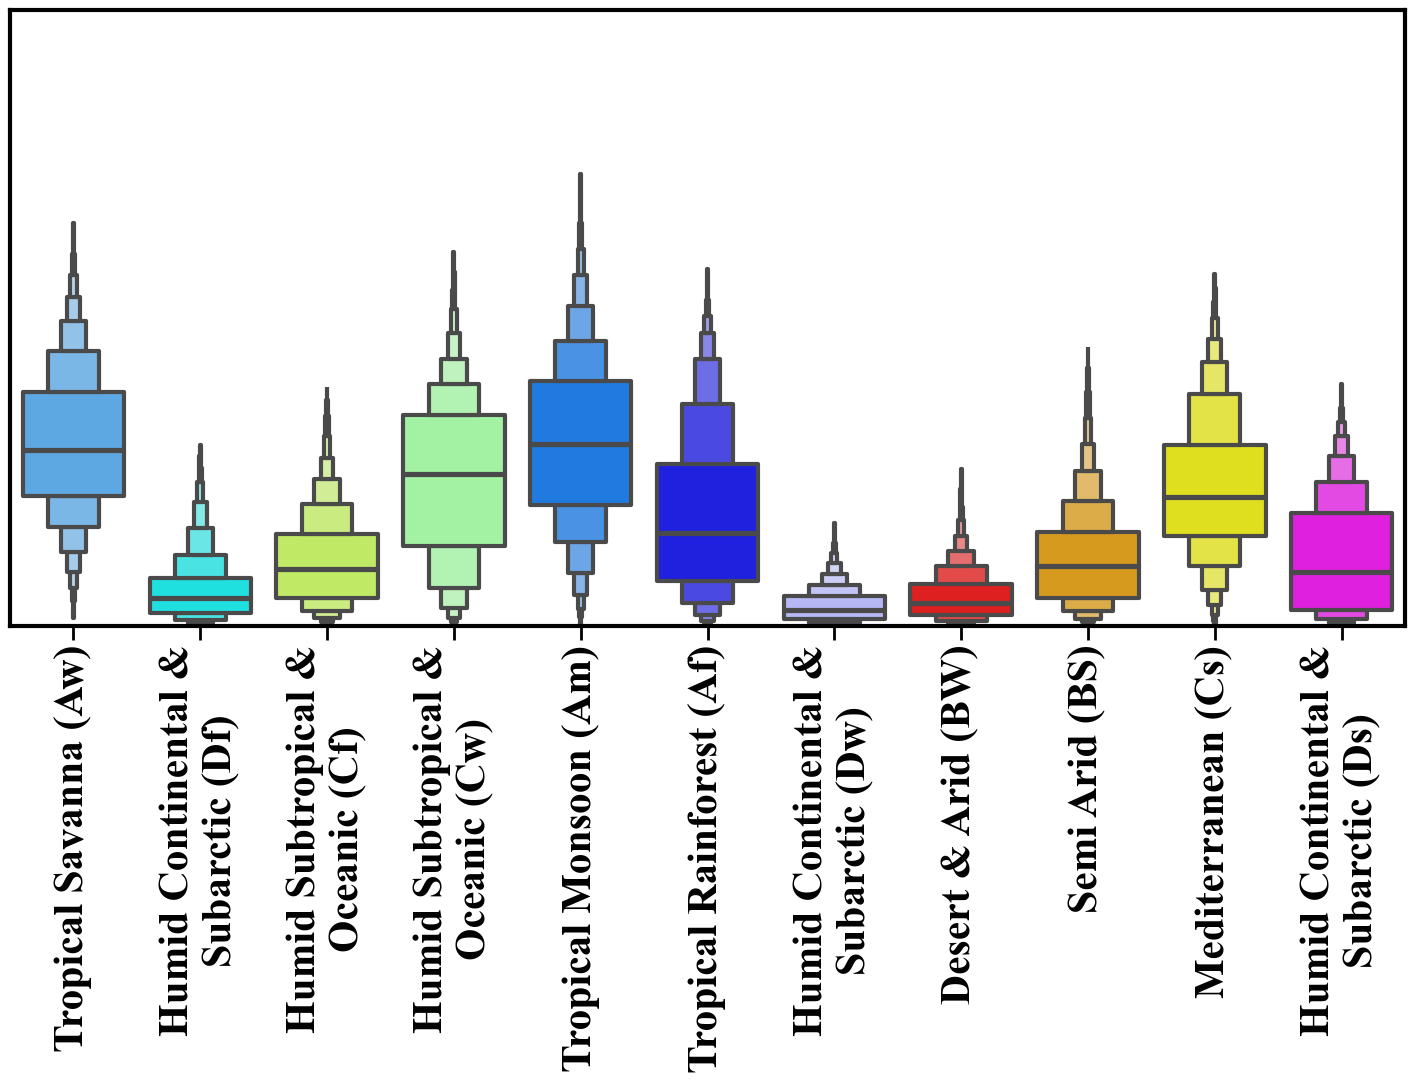

In [18]:
fig = plt.figure(figsize=(18, 8))

aesthetics_reorder_sorted = aesthetics_reorder.sort_values(by='number', ascending=True)
sns.boxenplot(x="Koppen_Together", y="Sbedrock", data=df_Koppen_sorted, linewidth=3,
              hue='Koppen_Together',palette=aesthetics_reorder_sorted['color'].unique(),
              order=aesthetics_reorder['number'].unique(),legend=False,    
              k_depth="proportion", outlier_prop=0.0078125, showfliers=False)
                
ax = plt.gca()

ax.tick_params(axis='x', which='major', length=10, width=2, direction='out')
ax.tick_params(axis='y', which='major', length=10, width=2, direction='out')

for spine in ax.spines.values():
    spine.set_edgecolor('black')  
    spine.set_linewidth(3)  

area_name = (aesthetics_reorder['area_sum'].unique()/1e9).round().astype(int)
print(area_name)
# for i, label in enumerate(ax.get_xticklabels()):
#     x_pos = label.get_position()[0]
#     median_value = df_Koppen_sorted[df_Koppen_sorted['Koppen_Together']==aesthetics_reorder['number'].unique()[i]]['Sbedrock'].median()
#     ax.text(x_pos, 1.5*median_value+300, f'{area_name[i]}', ha='center', va='bottom', fontsize=30, fontweight='bold', color='black')

plt.xlabel('')  
plt.ylabel("")  

plt.xticks(ticks=(aesthetics_reorder.index), labels=aesthetics_reorder['name'].unique(), fontsize=30, fontweight='bold',rotation = 'vertical')

plt.ylim(0, 800)
yticks = np.arange(0, 900, 100)
# plt.yticks(ticks=yticks, labels=yticks,fontsize=30, fontweight='bold')
plt.yticks([])
plt.show()
# fig.savefig('boxenplot2.pdf')

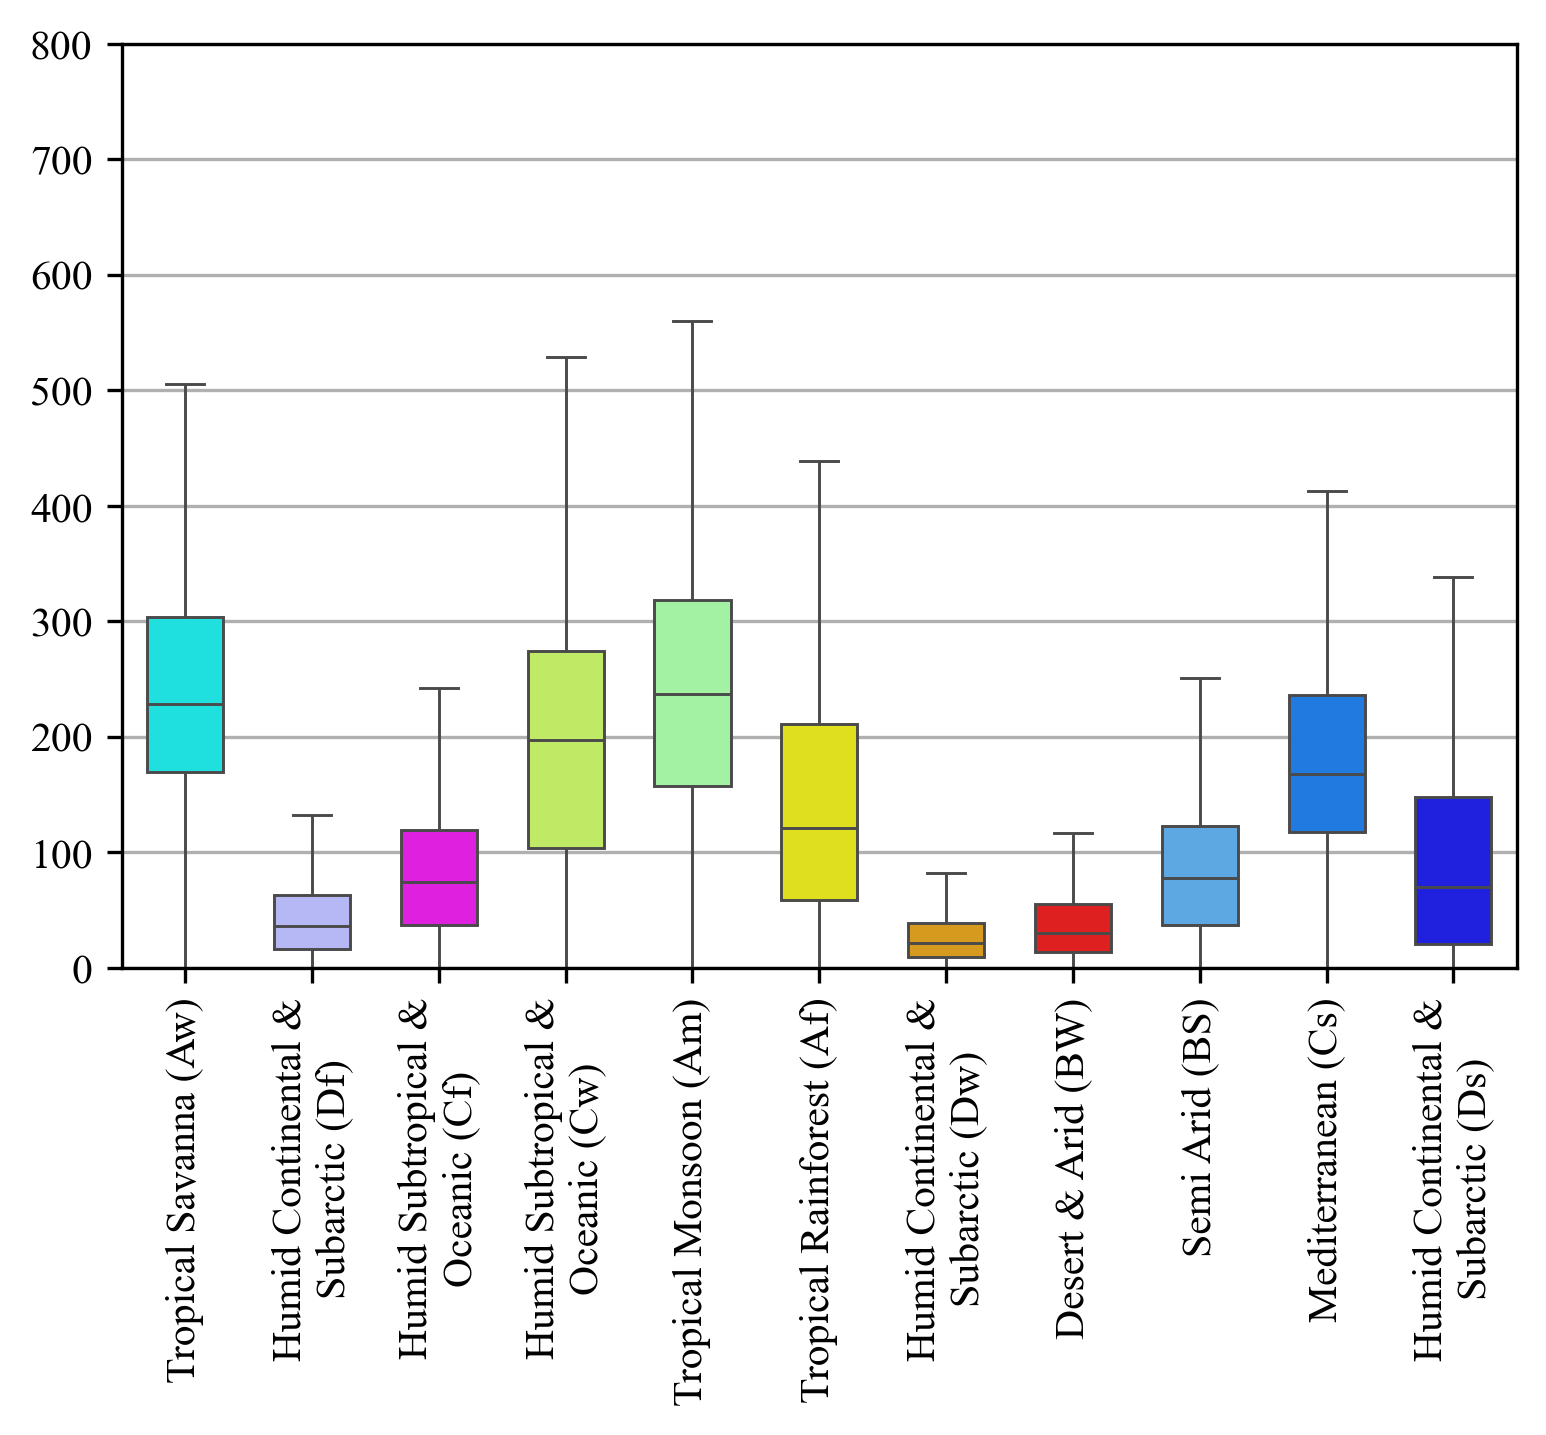

In [13]:
# set figure size
f, ax = plt.subplots(figsize=(6, 4), dpi=300) 
order = koppen_area_sum.index.tolist()
# sns.boxplot(x="Koppen_Together", y="Sbedrock", hue = "Koppen_Together", data=df_Koppen, width=.6, linewidth = .7, palette=aesthetics['color'].tolist(), whis = 1.5, showfliers = False)
sns.boxplot(x="Koppen_Together", y="Sbedrock", hue = "Area_sum", data=df_Koppen_sorted, width=.6, linewidth = .7, palette=aesthetics_reorder_sorted['color'].tolist(), whis = 1.5, showfliers = False, order=order)
plt.legend().remove()

# Tweak the visual presentation
# plt.xticks(np.arange(0, 11, step=1), labels = aesthetics['name'],rotation = 'vertical') # rotation='25', ha="right"
plt.xticks(np.arange(0, 11, step=1), labels = aesthetics_reorder['name'],rotation = 'vertical') # rotation='25', ha="right"
ax.yaxis.grid(True)
#ax.set_title('Köppen Climate Type')
ax.set_axisbelow(True)
#ax.set_xlabel(labels)
ax.set_ylim(0, 800)
ax.set_xlabel("")
ax.set_ylabel("")
#ax.set_ylabel('$S_{bedrock}$ (mm)')

# Uncomment to download fig:
plt.rcParams['pdf.fonttype'] = 42
# plt.savefig(f"{fig_path}/b1_Koppen.pdf", transparent=True, bbox_inches='tight')
# plt.savefig(f"{fig_path}/b1_Koppen_reorder.pdf", transparent=True, bbox_inches='tight')

In [14]:
## Check that no IGBP groups have less than 2km area
df_IGBP = df.copy()

#Remove IGBP 3 = Deciduous needleleaf forest
df_IGBP = df_IGBP[df_IGBP['IGBP'] < 10]
df_IGBP = df_IGBP[df_IGBP['IGBP'] > 0]
# df_IGBP = df_IGBP[df_IGBP['IGBP'] != 3]


igbp_area_sum = df_IGBP.groupby('IGBP')['Area'].sum().sort_values(ascending=False)
# print(igbp_area_sum)

df_IGBP_reorder = df_IGBP.merge(igbp_area_sum, how='left', on='IGBP', suffixes=('', '_sum'))
df_IGBP_sorted = df_IGBP_reorder.sort_values(by='Area_sum', ascending=False)
# print(df_IGBP_sorted)

lcoi = ['Evergreen Needleleaf\nForests','Evergreen Broadleaf\nForests',
        'Deciduous Needleleaf\nForests','Deciduous Broadleaf\nForests',
        'Mixed Forests',
        'Closed Shrublands','Open Shrublands',
        'Woody Savannas','Savannas','Grassland']
qgis_colors = ['#f8de85', '#FAC13E','#a5537f','#a52653',
               '#c04a02','#A4B381','#52B33F','#74B3B8',
               '#B183B8','#7846A8']
# qgis_colors = ['#05450a', '#086a10', '#54a708', '#78d203', 
#                 '#009900','#c6b044', '#dcd159', '#dade48',  
#                 '#fbff13']
IGBPList = ['Evergreen Needleleaf\nForests', 'Evergreen Broadleaf\nForests', 
            'Deciduous Needleleaf\nForests', 'Deciduous Broadleaf\nForests', 
            'Mixed Forests', 
            'Closed Shrublands', 'Open Shrublands', 
            'Woody Savannas', 'Savannas', 
            'Grasslands', 'Permanent Wetlands', 'Croplands', 
            'Urban and Built-up Lands', 'Cropland/Natural Vegetation Mosaics', 
            'Permanent Snow and Ice', 'Barren', 'Water Bodies']
land_numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9,10]

land_aes = pd.DataFrame()
land_aes['name'] = lcoi
land_aes['number'] = land_numbers
land_aes['color'] = qgis_colors

# Filter Koppen data and aesthetics by group for plotting:
IGBP_ids = df_IGBP['IGBP'].unique()
land_aesthetics = land_aes[land_aes.number.isin(IGBP_ids)]

land_aesthetics_reorder = land_aes[land_aes.number.isin(IGBP_ids)].copy()
land_aesthetics_reorder['Area_sum'] = land_aesthetics_reorder['number'].map(igbp_area_sum)
land_aesthetics_reorder = land_aesthetics_reorder.sort_values(by='Area_sum', ascending=False)
land_aesthetics_reorder.reset_index(drop=True, inplace=True)
print(land_aesthetics_reorder)

                            name  number    color      Area_sum
0                       Savannas       9  #B183B8  5.627381e+12
1   Evergreen Broadleaf\nForests       2  #FAC13E  4.512457e+12
2                 Woody Savannas       8  #74B3B8  3.825344e+12
3                  Mixed Forests       5  #c04a02  1.845395e+12
4                Open Shrublands       7  #52B33F  1.759471e+12
5   Deciduous Broadleaf\nForests       4  #a52653  1.388579e+12
6  Evergreen Needleleaf\nForests       1  #f8de85  7.688194e+11
7  Deciduous Needleleaf\nForests       3  #a5537f  1.426670e+11
8              Closed Shrublands       6  #A4B381  5.504510e+10


In [15]:
print(df_IGBP_sorted.groupby('IGBP')['Sbedrock'].median())

IGBP
1     55.026218
2    184.200855
3     30.884897
4     96.834823
5     50.163120
6     55.898627
7     30.333595
8     77.376540
9    153.876460
Name: Sbedrock, dtype: float64


/tmp/ipykernel_630894/3484056488.py:5: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.boxenplot(x="IGBP", y="Sbedrock", data=df_IGBP_sorted, linewidth=3,


[5627 4512 3825 1845 1759 1389  769  143   55]


([<matplotlib.axis.YTick at 0x147039635090>,
 [Text(0, 0, '0'),
  Text(0, 100, '100'),
  Text(0, 200, '200'),
  Text(0, 300, '300'),
  Text(0, 400, '400'),
  Text(0, 500, '500'),
  Text(0, 600, '600'),
  Text(0, 700, '700'),
  Text(0, 800, '800')])

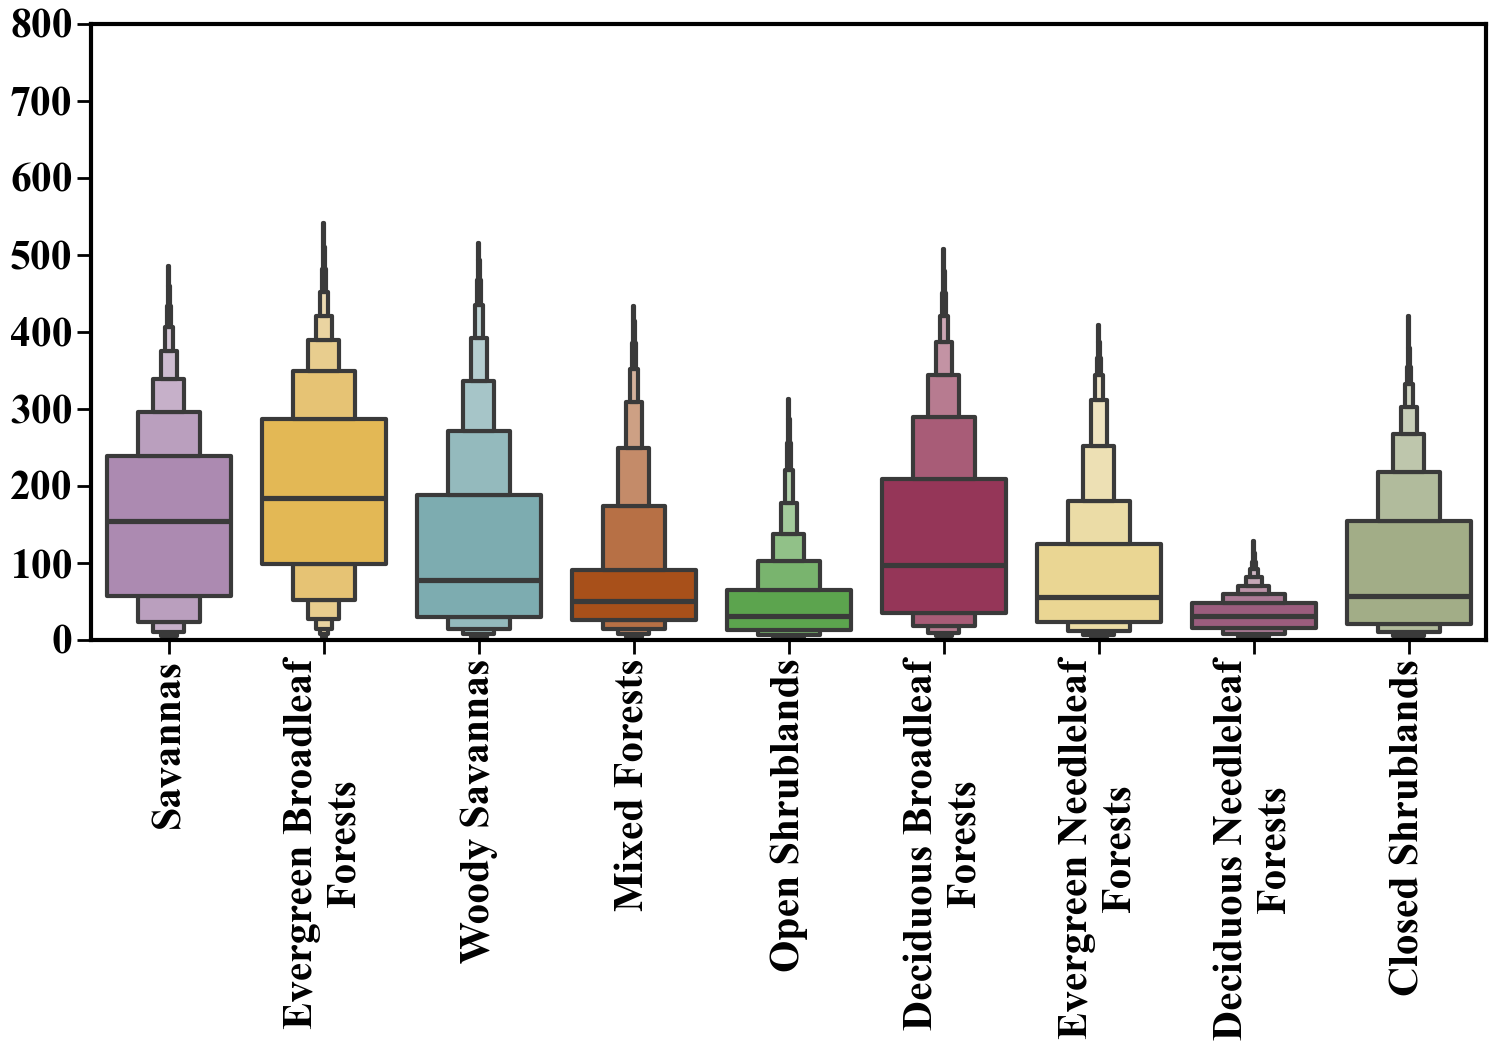

In [19]:
fig = plt.figure(figsize=(18, 8))

land_aesthetics_reorder_sorted = land_aesthetics_reorder.sort_values(by='number', ascending=True)
# print(land_aesthetics_reorder_sorted['color'].unique())
sns.boxenplot(x="IGBP", y="Sbedrock", data=df_IGBP_sorted, linewidth=3,
              hue='IGBP',palette=land_aesthetics_reorder_sorted['color'].unique(),
              order=land_aesthetics_reorder['number'].unique(), legend=False,
              k_depth="proportion", outlier_prop=0.0078125, showfliers=False)
      
ax = plt.gca()

ax.tick_params(axis='x', which='major', length=10, width=2, direction='out')
ax.tick_params(axis='y', which='major', length=10, width=2, direction='out')

for spine in ax.spines.values():
    spine.set_edgecolor('black')  
    spine.set_linewidth(3)  

area_name = (land_aesthetics_reorder['Area_sum'].unique()/1e9).round().astype(int)
print(area_name)
# for i, label in enumerate(ax.get_xticklabels()):
#     x_pos = label.get_position()[0]
#     median_value = df_IGBP_sorted[df_IGBP_sorted['IGBP']==land_aesthetics_reorder['number'].unique()[i]]['Sbedrock'].median()
#     ax.text(x_pos, median_value*1.2+480, f'{area_name[i]}', ha='center', va='bottom', fontsize=30, fontweight='bold', color='black')

plt.xlabel('')  
plt.ylabel("")  

plt.xticks(ticks=(land_aesthetics_reorder.index), labels=land_aesthetics_reorder['name'].unique(), fontsize=30, fontweight='bold',rotation = 'vertical')

plt.ylim(0, 800)
yticks = np.arange(0, 900, 100)
plt.yticks(ticks=yticks, labels=yticks,fontsize=30, fontweight='bold')

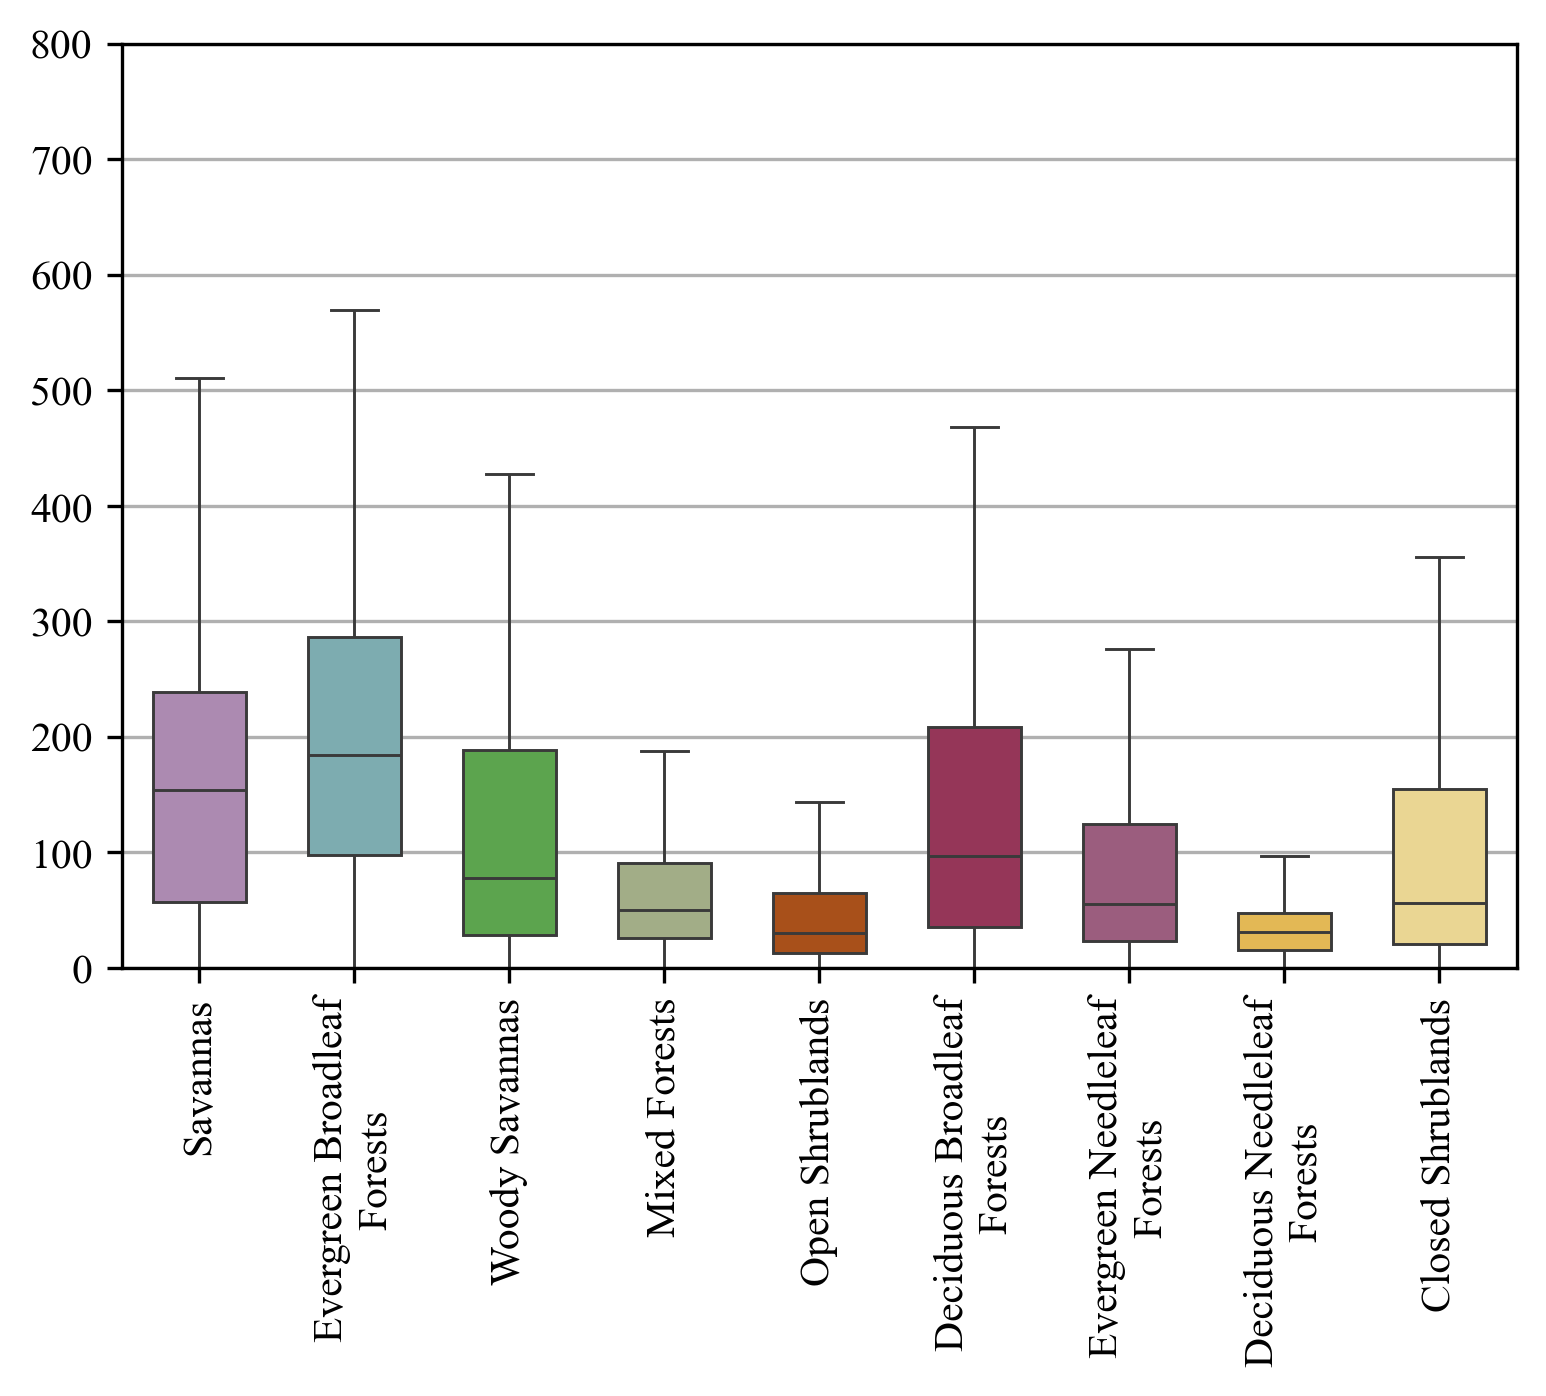

In [17]:
# Set fig size
f, ax = plt.subplots(figsize=(6, 4),dpi=300)
order = igbp_area_sum.index.tolist()
# sns.boxplot(x="IGBP", y="Sbedrock", data=df_IGBP, hue = "IGBP", width=.6, linewidth = .7, palette = land_aesthetics['color'].tolist(), whis = 1.5, showfliers = False)
sns.boxplot(x="IGBP", y="Sbedrock", data=df_IGBP_sorted, hue = "Area_sum", width=.6, linewidth = .7, palette = land_aesthetics_reorder_sorted['color'].tolist(), whis = 1.5, showfliers = False, order=order)
plt.legend().remove()
# plt.xticks(np.arange(0, 9, step=1), labels = land_aesthetics['name'], rotation = 'vertical') # rotation='25', ha="right"
plt.xticks(np.arange(0, 9, step=1), labels = land_aesthetics_reorder['name'], rotation = 'vertical') # rotation='25', ha="right"

# for i, label in enumerate(ax.get_xticklabels()):
#     x_pos = label.get_position()[0]
#     ax.text(x_pos+0.3, 85, f'{igbp_area_sum[i]:i4}', ha='center', va='bottom', fontsize=size1, fontweight='bold', color='black')
    
# Tweak the visual presentation
plt.xticks(rotation='vertical')
ax.set_axisbelow(True)
#ax.set_title('Biome')
ax.set_xlabel("")
ax.set_ylabel("")
ax.yaxis.grid(True)
ax.set_ylim(0, 800)
#ax.set_ylabel('$S_{bedrock}$ (mm)')

# Uncomment to download fig:
plt.rcParams['pdf.fonttype'] = 42
# plt.savefig(f"{fig_path}/b1_IGBP.pdf", transparent=True, bbox_inches='tight')
plt.savefig(f"{fig_path}/b1_IGBP_reorder.pdf", transparent=True, bbox_inches='tight')